In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams["font.family"] = "Times New Roman"

In [ ]:
data = pd.read_csv('data.csv')

In [291]:
%%time
conn = sqlite3.connect('dime.sqlite3')
data = pd.read_sql_query(
    '''SELECT contributor_cfscore, candidate_cfscore, \"cycle\", amount, contributor_state, contributor_gender, recipient_party, contributor_type   
    from contribDB cd 
    where election_type='P' and
    amount>=0 and
    recipient_party in ('100','200') and
    contributor_cfscore is not null and
    candidate_cfscore is not null and
    contributor_state is not null and
    contributor_state != '' and
    contributor_gender != ''
                         ''', conn)
data['diff'] = abs(data['contributor_cfscore'] - data['candidate_cfscore'])
data = data[data.contributor_state.isin(['ca', 'ny', 'tx', 'fl', 'ma', 'il', 'va', 'pa', 'mi', 'nj', 'md', 'ga',
       'wa', 'oh', 'nc', 'dc', 'co', 'az', 'mo', 'wi', 'mn', 'tn', 'ct', 'la',
       'in', 'or', 'ky', 'al', 'ok', 'sc', 'ia', 'nm', 'ks', 'nv', 'ar', 'nh',
       'hi', 'me', 'mt', 'ne', 'ut', 'ms', 'ri', 'ak', 'wv', 'de', 'sd', 'id',
       'vt', 'wy', 'nd'])]
data.reset_index(drop=True)
data.to_csv('data1.csv', index_label=False)

Wall time: 3min 57s


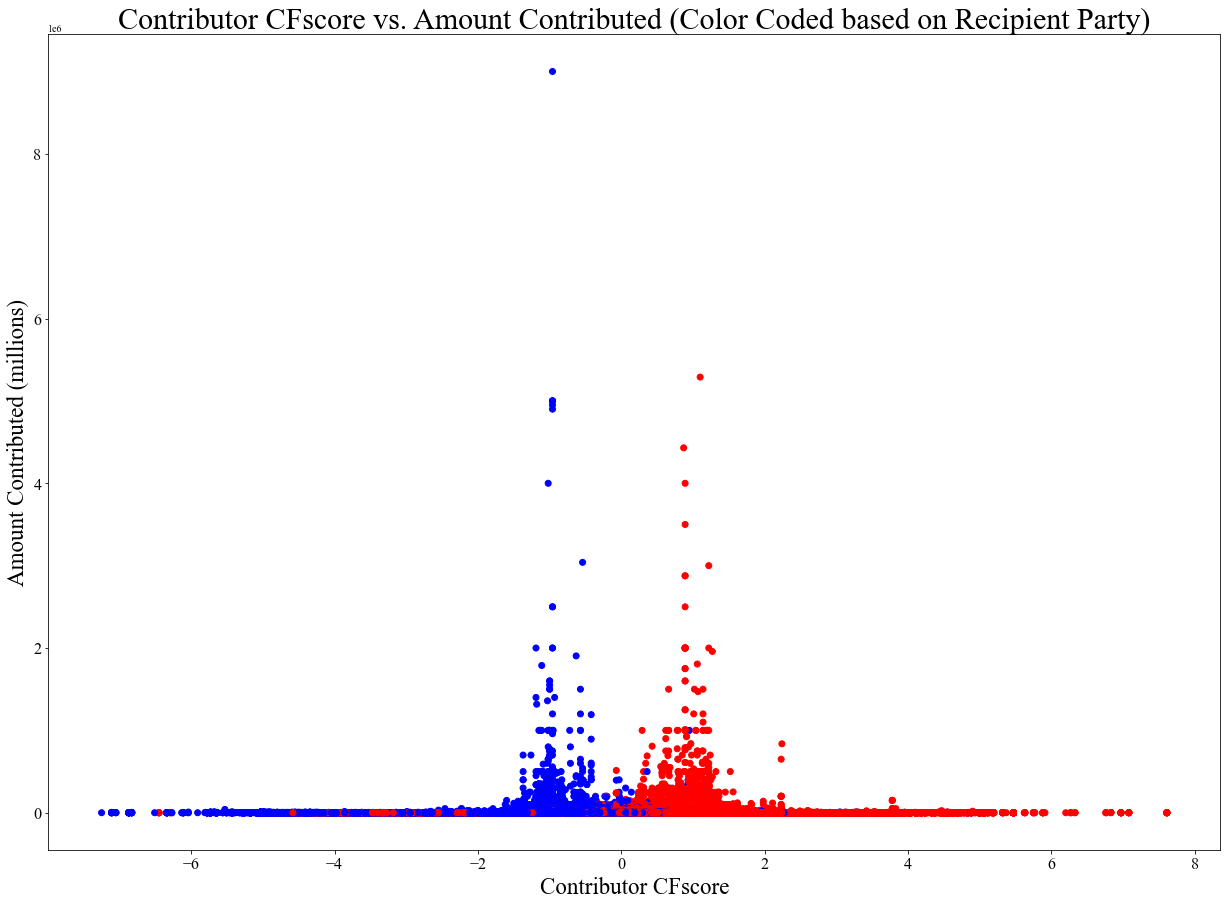

In [111]:
fig, ax = plt.subplots(1,1,figsize=(21,15))
colors = {100:'blue', 200:'red'}
labels = {100:'Democrat', 200:'Republican'}
ax.scatter(data['contributor_cfscore'],data['amount'], c=data['recipient_party'].map(colors), label=data['recipient_party'].map(labels))
ax.set_xlabel('Contributor CFscore', fontsize=23)
ax.set_ylabel('Amount Contributed (millions)', fontsize=23)
ax.set_title('Contributor CFscore vs. Amount Contributed (Color Coded based on Recipient Party)', fontsize=30)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

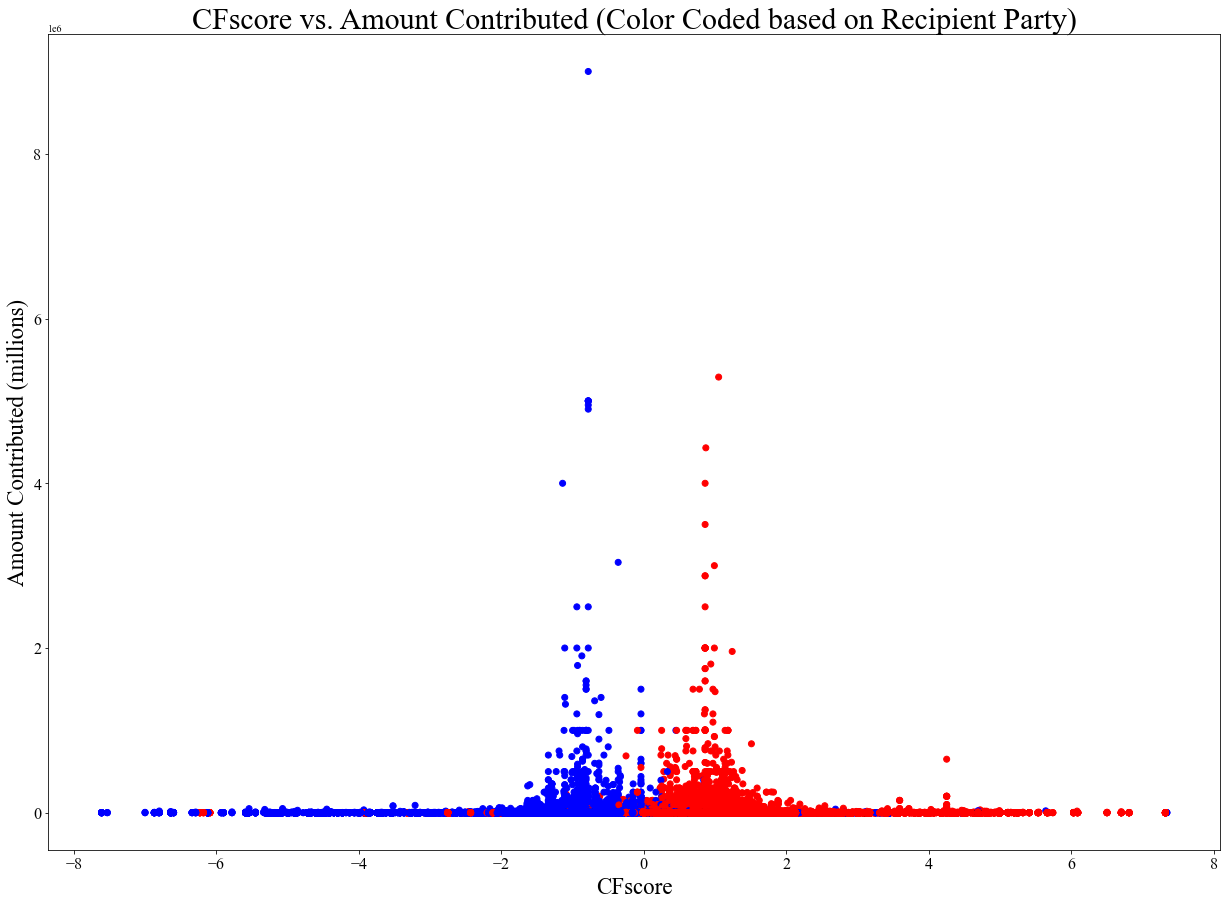

In [110]:
fig, ax = plt.subplots(1,1,figsize=(21,15))
colors = {100:'blue', 200:'red'}
labels = {100:'Democrat', 200:'Republican'}
ax.scatter(data['candidate_cfscore'],data['amount'], c=data['recipient_party'].map(colors), label=data['recipient_party'].map(labels))
ax.set_xlabel('Candidate CFscore', fontsize=23)
ax.set_ylabel('Amount Contributed (millions)', fontsize=23)
ax.set_title('Candidate CFscore vs. Amount Contributed (Color Coded based on Recipient Party)', fontsize=30)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

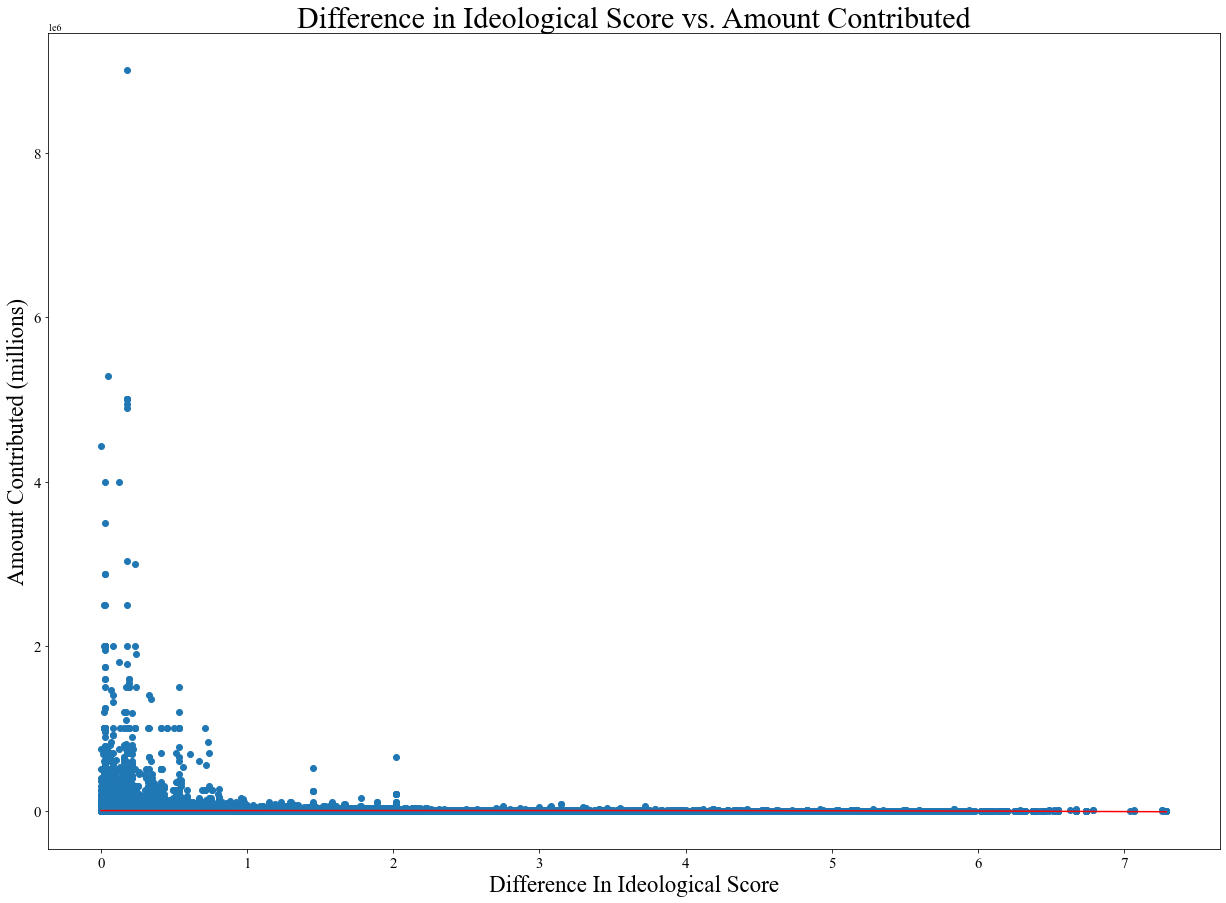

In [108]:
x = data['diff']
y = data['amount']
fig, ax = plt.subplots(1,1,figsize=(21,15))
ax.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)), color='red')
ax.set_xlabel('Difference In Ideological Score', fontsize=23)
ax.set_ylabel('Amount Contributed (millions)', fontsize=23)
ax.set_title('Difference in Ideological Score vs. Amount Contributed', fontsize=30)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show()

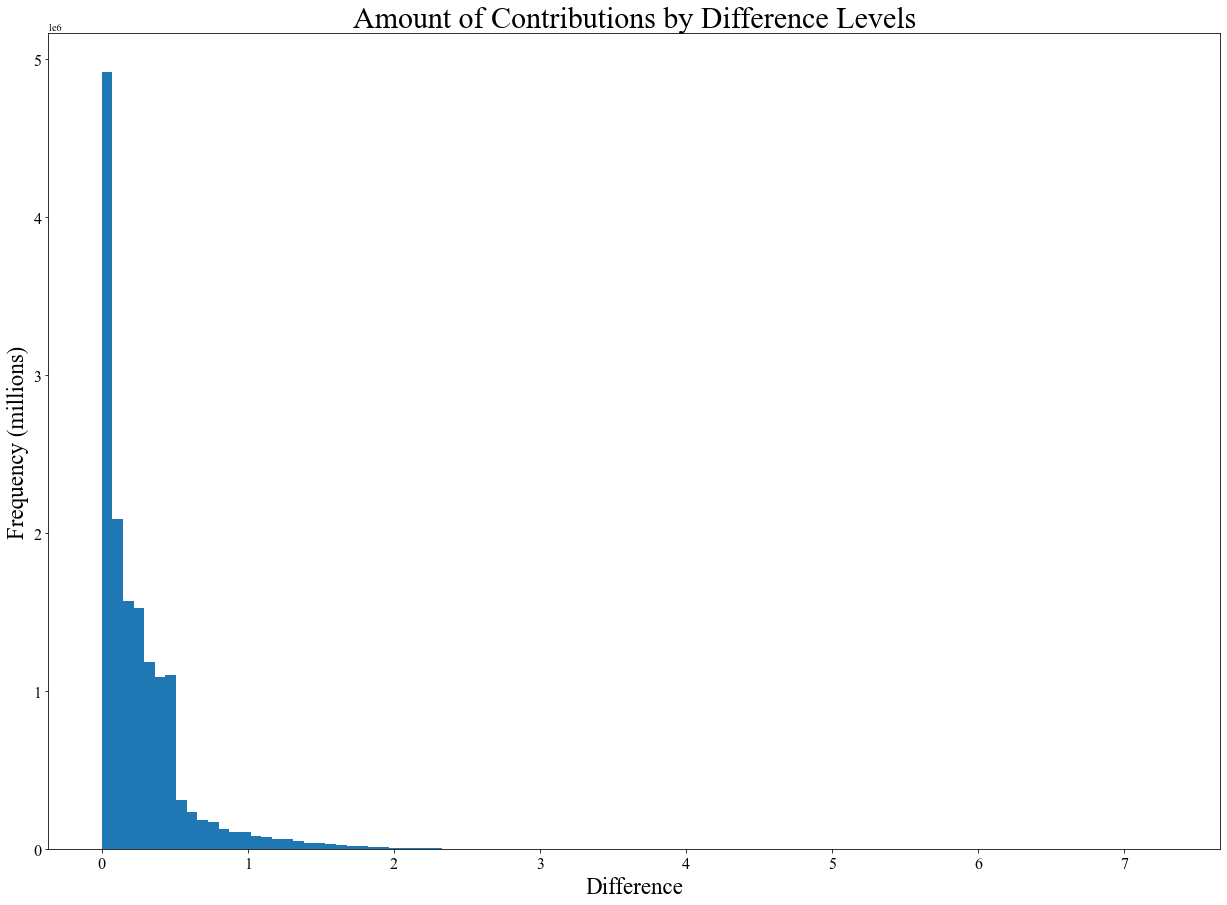

In [97]:
fig, ax = plt.subplots(1,1,figsize=(21,15))
ax.hist(x, bins=100)  # density=False would make counts
ax.set_xlabel('Difference', fontsize=23)
ax.set_ylabel('Frequency (millions)', fontsize=23)
ax.set_title('Amount of Contributions by Difference Levels', fontsize=30)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

In [75]:
data.loc[data['diff']<=0.518, 'amount'].count()

13464483

In [76]:
13464483/15235194 

0.8837749621041912

In [128]:
%%time
ols = smf.ols('amount ~ diff + C(cycle) + C(contributor_state) + C(contributor_gender) + C(recipient_party) + C(contributor_type)', data=data).fit()

MemoryError: Unable to allocate 8.29 GiB for an array with shape (73, 15235194) and data type float64

In [ ]:
ols.summary()

In [106]:
%%time
ols1 = smf.ols('amount ~ diff', data=data).fit()

Wall time: 59.1 s


In [107]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     812.8
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:02:43   Log-Likelihood:            -1.5566e+08
No. Observations:            15235194   AIC:                         3.113e+08
Df Residuals:                15235175   BIC:                         3.113e+08
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             549.7034     15.472     35.530      0.000     519.380     580.027
C(cycle)[T.1982]      370.7668     27.040     13.712      0.000     317.769     423.765
C(cycle)[T.1984]      387.2924     22.943     16.881      0.000     342.326     432.259
C(cycle)[T.1986]      334.4790     23.527     14.217      0.000     288.367     380.591
C(cycle)[T.1988]      433.7627     20.151     21.526      0.000     394.268     473.257
C(cycle)[T.1990]       68.2603     20.109      3.395      0.001      28.848     107.673
C(cycle)[T.1992]       32.6710     18.684      1.749      0.080      -3.948      69.290
C(cycle)[T.1994]        5.1088     19.131      0.267      0.789     -32.388      42.605
C(cycle)[T.1996]       25.3206     17.865      1.417      0.156      -9.693      60.335
C(cycle)[T.1998]       44.0103     17.759      2.478      0.013       9.203      78.818
C(cycle)[T.2000]       90.7142     17.011      5.333      0.000      57.374     124.055
C(cycle)[T.2002]       49.5065     17.102      2.895      0.004      15.988      83.025
C(cycle)[T.2004]      264.3216     16.616     15.908      0.000     231.755     296.888
C(cycle)[T.2006]      327.3575     16.556     19.772      0.000     294.908     359.807
C(cycle)[T.2008]      422.8959     16.145     26.193      0.000     391.252     454.540
C(cycle)[T.2010]      375.4496     16.691     22.494      0.000     342.735     408.164
C(cycle)[T.2012]      -50.8535     15.919     -3.195      0.001     -82.054     -19.653
C(cycle)[T.2014]      154.9972     16.523      9.381      0.000     122.613     187.381
contributor_cfscore    73.5298      1.599     45.993      0.000      70.396      76.663
==================================================================================
Omnibus:                 96484337.881   Durbin-Watson:                       1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   123390114966993904.000
Skew:                         521.847   Prob(JB):                             0.00
Kurtosis:                  440883.199   Cond. No.                             45.7
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

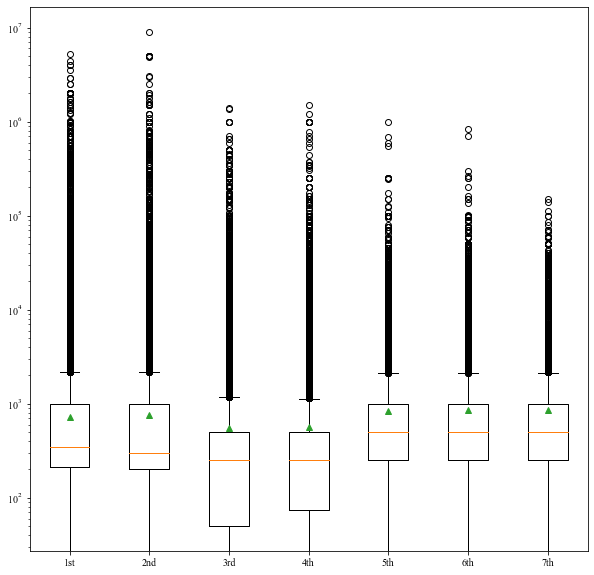

In [124]:
my_dict = {'1st': data.loc[data['diff']<=0.1458, 'amount'].to_list(),
           '2nd': data.loc[(data['diff']>=0.1458) & (data['diff']<=0.2916), 'amount'].to_list(),
           '3rd': data.loc[(data['diff']>=0.2916) & (data['diff']<=0.4374), 'amount'].to_list(),
           '4th': data.loc[(data['diff']>=0.4374) & (data['diff']<=0.5832), 'amount'].to_list(),
           '5th': data.loc[(data['diff']>=0.5832) & (data['diff']<=0.729), 'amount'].to_list(),
           '6th': data.loc[(data['diff']>=0.729) & (data['diff']<=0.8748), 'amount'].to_list(),
           '7th': data.loc[(data['diff']>=0.8748) & (data['diff']<=1.0206), 'amount'].to_list()
          }

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.boxplot(my_dict.values(), showmeans=True)
ax.set_xticklabels(my_dict.keys())
ax.set_yscale('log')

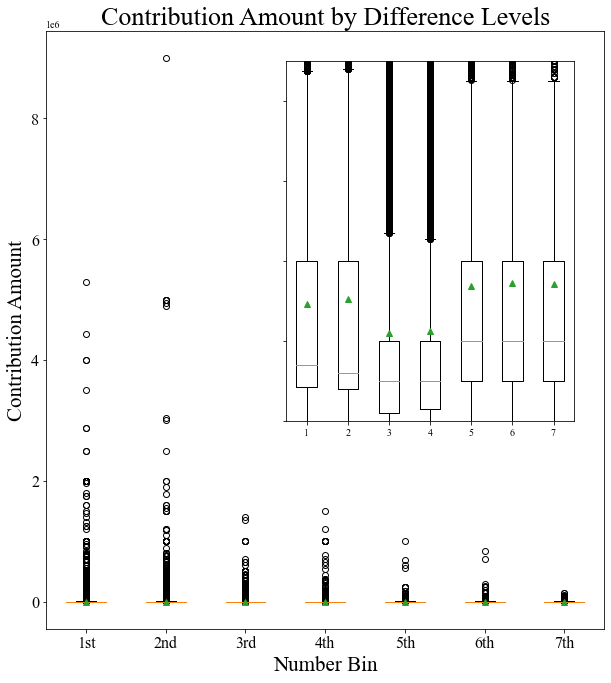

In [127]:
my_dict = {'1st': data.loc[data['diff']<=0.1458, 'amount'].to_list(),
           '2nd': data.loc[(data['diff']>=0.1458) & (data['diff']<=0.2916), 'amount'].to_list(),
           '3rd': data.loc[(data['diff']>=0.2916) & (data['diff']<=0.4374), 'amount'].to_list(),
           '4th': data.loc[(data['diff']>=0.4374) & (data['diff']<=0.5832), 'amount'].to_list(),
           '5th': data.loc[(data['diff']>=0.5832) & (data['diff']<=0.729), 'amount'].to_list(),
           '6th': data.loc[(data['diff']>=0.729) & (data['diff']<=0.8748), 'amount'].to_list(),
           '7th': data.loc[(data['diff']>=0.8748) & (data['diff']<=1.0206), 'amount'].to_list()
          }
fig, ax = plt.subplots(1,1,figsize=(10,11))
ax.boxplot(my_dict.values(), showmeans=True)
ax.set_xticklabels(my_dict.keys())
ax.set_xlabel('Number Bin', fontsize=21)
ax.set_ylabel('Contribution Amount', fontsize=21)
ax.set_title('Contribution Amount by Difference Levels', fontsize=26)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

axins = inset_axes(ax, width=4, height=5, loc=1, borderpad=3)
axins.set_xlim(0.5, 7.5)
axins.set_ylim(-1, 2250)
# plt.xticks(visible=False)
plt.yticks(visible=False)
axins.boxplot(my_dict.values(), showmeans=True)

plt.show()

In [133]:
data.loc[(data['contributor_cfscore']<0) & (data['candidate_cfscore']>0), 'amount']

118          125.0
234         1000.0
268         1000.0
320          100.0
354          200.0
             ...  
15283279     250.0
15283288     500.0
15283302     500.0
15283335     250.0
15283405     201.6
Name: amount, Length: 443933, dtype: float64

In [8]:
data.loc[data['diff']<=0.1458, 'amount'].mean()
data.loc[(data['diff']>=0.1458) & (data['diff']<=0.2916), 'amount'].mean()
data.loc[(data['diff']>=0.2916) & (data['diff']<=0.4374), 'amount'].mean()
data.loc[(data['diff']>=0.4374) & (data['diff']<=0.5832), 'amount'].mean()
data.loc[(data['diff']>=0.5832) & (data['diff']<=0.729), 'amount'].mean()
data.loc[(data['diff']>=0.729) & (data['diff']<=0.8748), 'amount'].mean()
data.loc[(data['diff']>=0.8748) & (data['diff']<=1.0206), 'amount'].mean()

856.6530264092705

In [68]:
means = {'1st': data.loc[data['diff']<=0.1458, 'amount'].mean(),
         '2nd': data.loc[(data['diff']>=0.1458) & (data['diff']<=0.2916), 'amount'].mean(),
         '3rd': data.loc[(data['diff']>=0.2916) & (data['diff']<=0.4374), 'amount'].mean(),
         '4th': data.loc[(data['diff']>=0.4374) & (data['diff']<=0.5832), 'amount'].mean(),
         '5th': data.loc[(data['diff']>=0.5832) & (data['diff']<=0.729), 'amount'].mean(),
         '6th': data.loc[(data['diff']>=0.729) & (data['diff']<=0.8748), 'amount'].mean(),
         '7th': data.loc[(data['diff']>=0.8748) & (data['diff']<=1.0206), 'amount'].mean(),
         '8th': data.loc[(data['diff']>=1.0206) & (data['diff']<=1.1664), 'amount'].mean(),
         '9th': data.loc[(data['diff']>=1.1664) & (data['diff']<=1.3122), 'amount'].mean(),
         '10th': data.loc[(data['diff']>=1.3122) & (data['diff']<=1.458), 'amount'].mean()
          }

In [87]:
sum(means.values())/len(means.values())

770.0503623073206

In [90]:
data['amount'].mean()

703.1811637606963

In [92]:
data.loc[data['amount']>=1000,'amount']

0           29076.0
1           10149.0
2            6516.0
3            1181.0
4            2034.0
             ...   
15283472     1000.0
15283474     1000.0
15283475     1000.0
15283476     1000.0
15283481     2500.0
Name: amount, Length: 3949484, dtype: float64

In [187]:
np.percentile(data.loc[data['diff']<=0.1458, 'amount'], 25)  # Q1

210.0

In [188]:
np.percentile(data.loc[data['diff']<=0.1458, 'amount'], 50)  # median

350.0

In [189]:
np.percentile(data.loc[data['diff']<=0.1458, 'amount'], 75)  # Q3

1000.0

In [190]:
data.loc[data['diff']<=0.1458, 'amount'].mean()

728.5604955127787

In [114]:
data.loc[data['candidate_cfscore']<=-2 , 'candidate_cfscore']

8218       -4.41
8219       -4.41
8220       -4.41
8221       -4.41
8222       -4.41
            ... 
15218981   -4.69
15218982   -4.69
15223622   -2.75
15233620   -2.06
15233986   -4.41
Name: candidate_cfscore, Length: 67017, dtype: float64

In [197]:
13847375/15235194 

0.9089070345937177

In [115]:
np.percentile(data['candidate_cfscore'], 25)  # Q1

-1.12

In [116]:
np.percentile(data['candidate_cfscore'], 50)  # Q1

-0.42

In [117]:
np.percentile(data['candidate_cfscore'], 75)  # Q1

0.95

In [118]:
data['candidate_cfscore'].mean()

-0.11103609051515857

In [119]:
np.percentile(data['contributor_cfscore'], 25)  # Q1

-1.18

In [120]:
np.percentile(data['contributor_cfscore'], 50)  # Q1

-0.28

In [121]:
np.percentile(data['contributor_cfscore'], 75)  # Q1

0.97

In [122]:
data['contributor_cfscore'].mean()

-0.1441823149741319

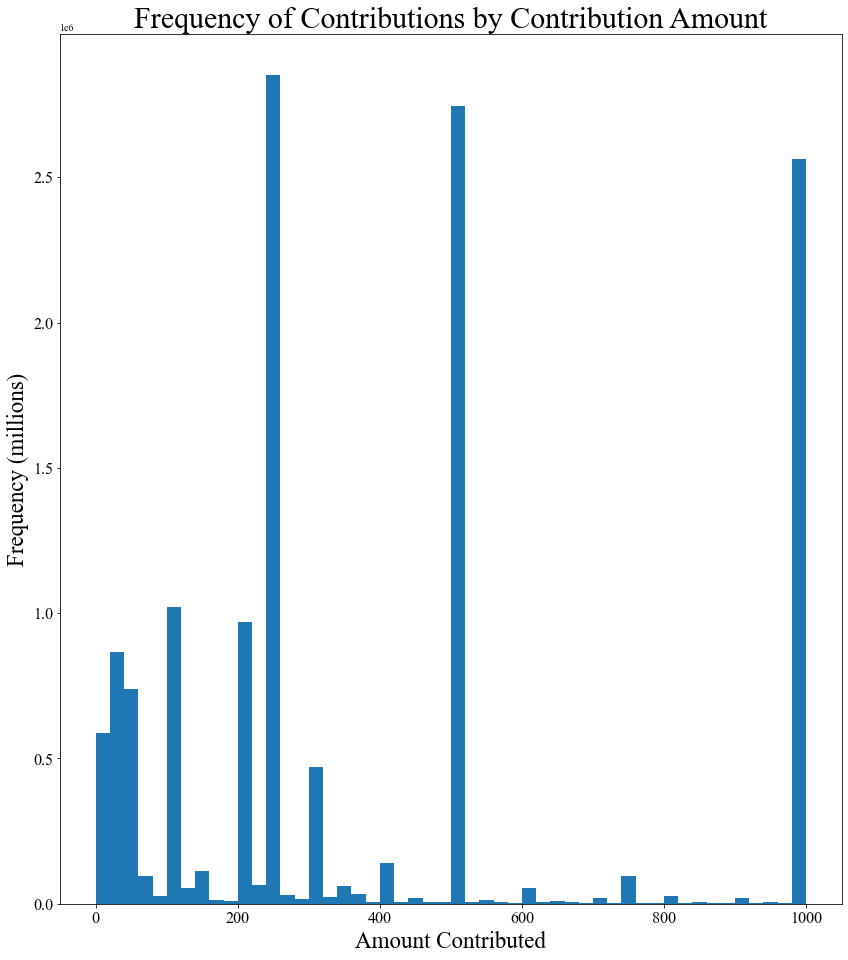

In [98]:
fig, ax = plt.subplots(1,1,figsize=(14,16))
ax.hist(data.loc[data['amount']<=1000 , 'amount'], bins=50)  # density=False would make counts
ax.set_xlabel('Amount Contributed', fontsize=23)
ax.set_ylabel('Frequency (millions)', fontsize=23)
ax.set_title('Frequency of Contributions by Contribution Amount', fontsize=30)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

In [22]:
x1 = data.loc[(data['diff']<=0.1458)& (data['amount']<=1000), 'amount']
x2 = data.loc[(data['diff']>=0.1458) & (data['diff']<=0.2916)& (data['amount']<=1000), 'amount']
x3 = data.loc[(data['diff']>=0.2916) & (data['diff']<=0.4374)& (data['amount']<=1000), 'amount']
x4 = data.loc[(data['diff']>=0.4374) & (data['diff']<=0.5832)& (data['amount']<=1000), 'amount']
x5 = data.loc[(data['diff']>=0.5832) & (data['diff']<=0.729)& (data['amount']<=1000), 'amount']
x6 = data.loc[(data['diff']>=0.729) & (data['diff']<=0.8748)& (data['amount']<=1000), 'amount']
x7 = data.loc[(data['diff']>=0.8748) & (data['diff']<=1.0206)& (data['amount']<=1000), 'amount']
x8 = data.loc[(data['diff']>=1.0206) & (data['diff']<=1.1664)& (data['amount']<=1000), 'amount']
x9 = data.loc[(data['diff']>=1.1664) & (data['diff']<=1.3122)& (data['amount']<=1000), 'amount']
x10 = data.loc[(data['diff']>=1.3122) & (data['diff']<=1.458)& (data['amount']<=1000), 'amount']

In [27]:
from matplotlib.patches import Rectangle

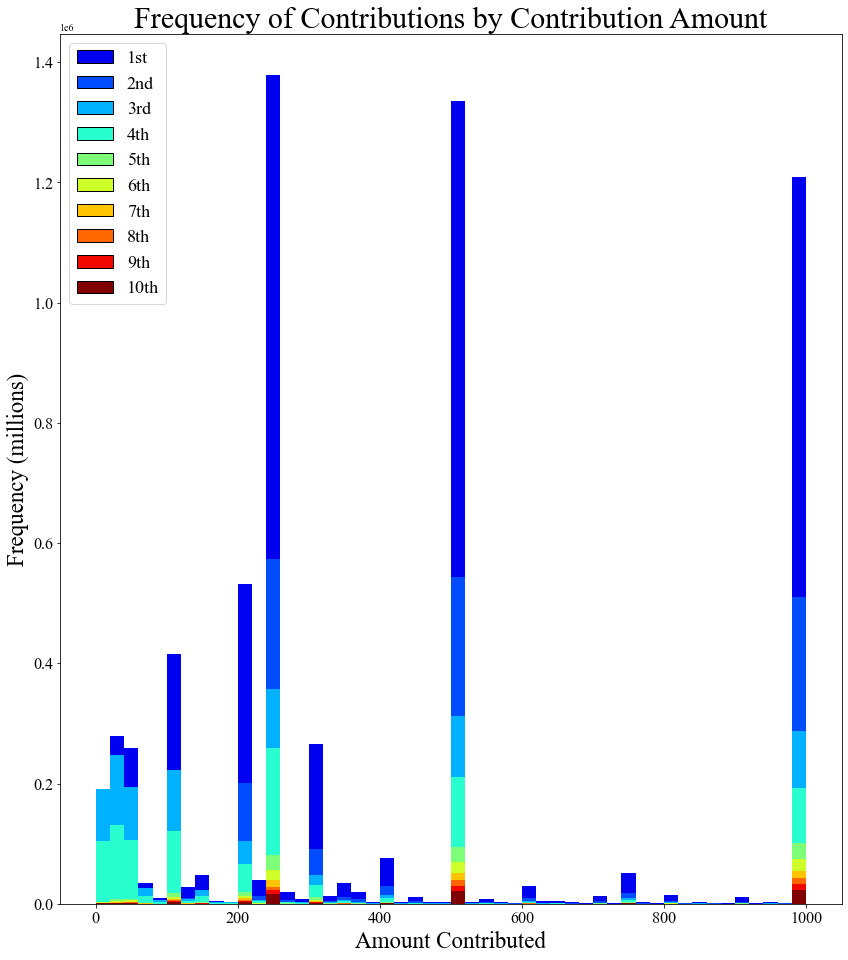

In [102]:
bins = 50
fig, ax = plt.subplots(1,1,figsize=(14,16))
cmap = plt.get_cmap('jet')
colors = {'1st': cmap(0.1),
         '2nd': cmap(0.2),
         '3rd': cmap(0.3),
         '4th': cmap(0.4),
         '5th': cmap(0.5),
         '6th': cmap(0.6),
         '7th': cmap(0.7),
         '8th': cmap(0.8),
         '9th': cmap(0.9),
         '10th': cmap(1.0)
          }
ax.hist(x1, bins, stacked=True, color = colors['1st'])
ax.hist(x2, bins, stacked=True, color = colors['2nd'])
ax.hist(x3, bins, stacked=True, color = colors['3rd'])
ax.hist(x4, bins, stacked=True, color = colors['4th'])
ax.hist(x5, bins, stacked=True, color = colors['5th'])
ax.hist(x6, bins, stacked=True, color = colors['6th'])
ax.hist(x7, bins, stacked=True, color = colors['7th'])
ax.hist(x8, bins, stacked=True, color = colors['8th'])
ax.hist(x9, bins, stacked=True, color = colors['9th'])
ax.hist(x10, bins, stacked=True, color = colors['10th'])
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors.values()]
labels= ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
ax.set_xlabel('Amount Contributed', fontsize=23)
ax.set_ylabel('Frequency (millions)', fontsize=23)
ax.set_title('Frequency of Contributions by Contribution Amount', fontsize=30)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(handles, labels, prop={'size': 18})